1. We are talking about death causes around the world
2. We want to show that people die from sedentary lifestyle diseases for the North / Infectious diseases for the South because of poverty/climate.
3. Finding the right database was a bit complicated because the format would not let us use it or it didn't contain the pieces of information we needed.
    Sources :
    - Income classification : https://blogs.worldbank.org/opendata/new-country-classifications-income-level-2018-2019
    - Income list : https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2016&name_desc=false&start=2000
    - Causes of death DataBase : https://www.who.int/healthinfo/global_burden_disease/estimates/en/

In [1]:
#list this as tools used

import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import geopandas
sns.set_style()

In [2]:
death_causes_2016 = (pd.read_excel("Deaths2016.xls", skiprows=6, sheet_name='Deaths All ages'))
death_causes_2016

,Sex,GHE code,Unnamed: 2,GHE cause,Unnamed: 4,Unnamed: 5,Member State (See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,ISO-3 Code,AFG,ALB,DZA,...,TZA,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4,...,5,1,2,1,4,2,4,4,5,5
2,Persons,NaN,NaN,Population ('000) (2),NaN,NaN,NaN,34656,2926,40606,...,55572,322180,3444,31447,270,31568,94569,27584,16591,16150
3,Persons,0.0,NaN,All Causes,NaN,NaN,NaN,248.22,26.0851,190.284,...,408.734,2802.15,32.7392,171.444,1.31607,180.956,548.836,174.122,124.817,129.736
4,Persons,10.0,I.,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,90.3075,0.750576,28.1903,...,228.225,144.627,2.49257,17.7378,0.248074,20.4036,62.8433,50.0096,75.6128,70.8864
5,Persons,20.0,NaN,A.,Infectious and parasitic diseases,NaN,NaN,29.6636,0.142651,6.62171,...,128.585,56.2862,0.753441,5.09514,0.0986793,7.64418,32.0456,14.6004,46.4205,41.6997
6,Persons,30.0,NaN,NaN,1.,Tuberculosis,NaN,11.5803,0.0085081,3.14597,...,27.5592,0.577354,0.0792858,1.87924,0.0247699,0.839806,12.7471,1.90817,4.75972,1.18479
7,Persons,40.0,NaN,NaN,2.,STDs excluding HIV,NaN,2.21341,0.000781532,0.108749,...,3.48643,0.17666,0.00906838,0.0471124,0.00903694,0.0629737,0.273739,3.31958,0.541381,0.491385
8,Persons,50.0,NaN,NaN,NaN,a.,Syphilis,2.19941,0.00042322,0.103133,...,3.31867,0.0697205,0.0046033,0.0432372,0.00885958,0.0578508,0.250203,3.30548,0.486122,0.40437
9,Persons,60.0,NaN,NaN,NaN,b.,Chlamydia,0.00278996,6.86976e-05,0.00106579,...,0.0331593,0.0213917,0.000889221,0.000798494,3.42776e-05,0.000959402,0.0045862,0.00276926,0.0110517,0.0173427


In [3]:
death_causes_2016 = death_causes_2016.drop([death_causes_2016.columns[1],death_causes_2016.columns[2],death_causes_2016.columns[5],death_causes_2016.columns[6]], axis=1)

In [4]:
death_causes_2016 = death_causes_2016.dropna(subset=["Sex"]).dropna(subset=["Unnamed: 4"]).dropna(subset=["GHE cause"])

In [5]:
death_causes_2016 = death_causes_2016.rename(index=str, columns={"Unnamed: 4": "Cause"})

In [6]:
death_causes_2016

,Sex,GHE cause,Cause,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
5,Persons,A.,Infectious and parasitic diseases,29.6636,0.142651,6.62171,76.5769,0.0302264,13.8652,0.239873,...,128.585,56.2862,0.753441,5.09514,0.0986793,7.64418,32.0456,14.6004,46.4205,41.6997
49,Persons,B.,Respiratory Infectious,17.1085,0.431428,8.73013,24.1063,0.0329375,32.7117,0.324052,...,37.1349,66.426,1.37232,5.00878,0.0731428,6.74654,16.5638,12.2829,10.6102,11.2625
53,Persons,C.,Maternal conditions,3.52749,0.00814223,0.965293,3.39893,0.00307631,0.421797,0.0070497,...,9.98412,0.595266,0.00696518,0.237813,0.00500481,0.608692,0.879578,3.18841,1.5822,2.76668
54,Persons,D.,Neonatal conditions,39.2898,0.162199,11.7031,31.7283,0.00397316,3.4603,0.219609,...,40.8755,11.7001,0.175516,7.19292,0.0620257,4.70504,13.1364,19.5087,12.9017,10.8396
59,Persons,E.,Nutritional deficiencies,0.718093,0.00615538,0.170054,7.21391,0.006982,1.72247,0.00314014,...,11.6455,9.61898,0.184326,0.203151,0.00922145,0.699102,0.217883,0.429232,4.09822,4.31801
66,Persons,A.,Malignant neoplasms,19.9648,5.13836,25.166,8.45534,0.133512,65.6575,7.95322,...,27.2071,627.709,8.61453,13.8464,0.200181,28.5696,102.283,10.4542,8.02355,8.87239
103,Persons,B.,Other neoplasms,1.09167,0.302784,0.681041,0.444139,0.00320942,3.01903,0.101277,...,0.789031,16.5371,0.317793,0.425615,0.00172486,2.81432,0.975664,0.74516,0.342593,0.0942992
104,Persons,C.,Diabetes mellitus,7.05636,0.1679,8.38953,2.3786,0.052973,9.23268,1.09297,...,6.44355,84.3318,0.933587,5.71405,0.0786476,14.9331,20.754,3.85387,1.47498,3.58984
105,Persons,D.,"Endocrine, blood, immune disorders",1.64954,0.117051,1.52373,1.62709,0.0183859,3.5516,0.0280061,...,2.67757,45.3978,0.437365,0.239336,0.00640918,0.903266,2.25538,1.1773,0.773082,0.772266
110,Persons,E.,Mental and substance use disorders,0.276119,0.0455308,0.484045,0.525433,0.00717129,1.63562,0.0783417,...,0.771066,48.0935,0.141754,0.622294,0.00115006,0.323042,1.87101,0.347437,0.192534,0.500277


In [7]:
death_causes_2016 = death_causes_2016.drop([death_causes_2016.columns[1]], axis=1)

In [8]:
death_causes_2016 = death_causes_2016.replace(".", value=0)
death_causes_2016 = death_causes_2016.reset_index(drop=True)
death_causes_2016.describe()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,7.194784,0.756091,5.515491,6.542271,0.018756,9.506691,0.816832,4.623228,2.337719,1.811871,...,11.847369,81.221871,0.948962,4.969385,0.038147,5.245098,15.908291,5.047015,3.617883,3.760470
std,10.449058,2.244098,10.430079,12.091644,0.034977,16.188434,2.056036,9.050591,5.477785,4.794178,...,20.459342,150.260324,1.762175,14.244273,0.068669,9.052257,28.604254,8.712625,7.017025,6.417053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.216784,0.008142,0.289311,0.444139,0.002259,0.979555,0.007050,0.299963,0.067310,0.017963,...,0.741338,5.390281,0.101084,0.123232,0.001265,0.323042,0.426955,0.284816,0.202844,0.161707
50%,2.892838,0.103268,2.493442,2.044827,0.006982,2.929886,0.101277,1.292372,0.486227,0.562993,...,3.980744,27.563474,0.307828,1.522439,0.014809,1.693464,6.988814,2.269184,1.171827,1.803669
75%,9.128315,0.313573,6.149378,7.160587,0.018321,10.043495,0.608163,3.455432,1.727193,1.382573,...,14.121134,69.662770,0.888643,3.553600,0.040385,4.795541,17.777403,5.688990,4.098216,4.167315
max,51.243870,14.930171,69.172785,76.576894,0.212038,91.028500,12.287522,45.748525,33.017199,32.389889,...,128.584922,837.249785,9.233465,98.917449,0.440395,54.181977,172.312503,56.792502,46.420499,41.699661


In [9]:
death_causes_2016.head()

,Sex,Cause,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,Infectious and parasitic diseases,29.663635,0.142651,6.621706,76.576894,0.030226,13.865248,0.239873,2.559006,...,128.584922,56.286212,0.753441,5.095142,0.098679,7.644177,32.045590,14.600430,46.420499,41.699661
1,Persons,Respiratory Infectious,17.108452,0.431428,8.730130,24.106342,0.032937,32.711715,0.324052,3.908884,...,37.134919,66.426032,1.372319,5.008780,0.073143,6.746543,16.563817,12.282859,10.610157,11.262487
2,Persons,Maternal conditions,3.527495,0.008142,0.965293,3.398927,0.003076,0.421797,0.007050,0.019584,...,9.984121,0.595266,0.006965,0.237813,0.005005,0.608692,0.879578,3.188413,1.582205,2.766676
3,Persons,Neonatal conditions,39.289847,0.162199,11.703068,31.728272,0.003973,3.460298,0.219609,0.520460,...,40.875485,11.700098,0.175516,7.192918,0.062026,4.705042,13.136400,19.508694,12.901685,10.839593
4,Persons,Nutritional deficiencies,0.718093,0.006155,0.170054,7.213909,0.006982,1.722473,0.003140,0.299963,...,11.645517,9.618979,0.184326,0.203151,0.009221,0.699102,0.217883,0.429232,4.098216,4.318011


In [10]:
death_causes_2016 = death_causes_2016.drop((death_causes_2016[death_causes_2016.Sex=="Males"].index)).drop((death_causes_2016[death_causes_2016.Sex=="Females"].index))

In [11]:
gdp = (pd.read_excel('gdp_per_capita.xls', skiprows=3, sheet_name='Data'))

In [12]:
gdp = gdp[["Country Name","2016"]]

In [13]:
gdp = gdp.dropna(subset = ["2016"])

In [14]:
gdp = gdp.reset_index(drop=True)

In [15]:
country_labels= ['Low_income', 'Lower_middle_income', 'Upper_middle_income', 'High_income']
cutoffs = [0,995,3895,12055,200000]

In [16]:
Category_2016 = pd.cut(gdp['2016'],cutoffs, labels=country_labels)
gdp.insert(2, 'Category_2016', Category_2016)

In [17]:
gdp.head()

,Country Name,2016,Category_2016
0,Aruba,25251.639678,High_income
1,Afghanistan,549.582760,Low_income
2,Angola,3509.604211,Lower_middle_income
3,Albania,4131.872341,Upper_middle_income
4,Andorra,37231.815671,High_income


In [18]:
low_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='Low_income'])
Lower_middle_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='Lower_middle_income'])
Upper_middle_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='Upper_middle_income'])
High_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='High_income'])

In [19]:
liste_category_2016=[low_income_2016,Lower_middle_income_2016,Upper_middle_income_2016,High_income_2016]
df_2016 = pd.DataFrame()
for cat in liste_category_2016:
    for cat1 in cat:
        if cat1 in death_causes_2016.columns:
            df_2016=df_2016.append(death_causes_2016[cat1])

In [20]:
# Each dataframe contains the columns of the countries from the same category
low_income_2016_df=death_causes_2016.loc[:,[i in low_income_2016 for i in death_causes_2016.columns]]
low_middle_income_2016_df=death_causes_2016.loc[:,[i in Lower_middle_income_2016 for i in death_causes_2016.columns]]
up_middle_income_2016_df=death_causes_2016.loc[:,[i in Upper_middle_income_2016 for i in death_causes_2016.columns]]
high_income_2016_df=death_causes_2016.loc[:,[i in High_income_2016 for i in death_causes_2016.columns]]

In [21]:
# sum of columns of year 2016
death_causes_2016['low_income_2016']=low_income_2016_df.mean(axis = 1) 
death_causes_2016['low_middle_income_2016']=low_middle_income_2016_df.mean(axis=1)
death_causes_2016['up_middle_income_2016']=up_middle_income_2016_df.mean(axis=1)
death_causes_2016['high_income_2016']=high_income_2016_df.mean(axis=1)

In [22]:
death_causes_2016_simplified = death_causes_2016[["Sex","Cause","low_income_2016","low_middle_income_2016","up_middle_income_2016","high_income_2016"]]

In [23]:
#sns.heatmap(death_causes_2016.corr())

#very useful !!

In [24]:
low_income_2016_df.head()

,Afghanistan,Benin,Burkina Faso,Burundi,Central African Republic,Chad,Ethiopia,Guinea,Guinea-Bissau,Haiti,...,Mozambique,Nepal,Niger,Rwanda,Sierra Leone,Somalia,South Sudan,Tajikistan,Togo,Uganda
0,29.663635,24.937408,49.571423,25.746708,23.579309,51.430884,168.659370,36.021287,5.869303,12.218149,...,116.023796,24.057996,60.966574,14.374599,29.202917,52.441108,44.478016,2.945033,18.402916,89.220754
1,17.108452,11.634963,15.664883,9.730623,5.349117,27.250975,66.695493,13.995796,1.719448,6.983569,...,17.569365,9.734391,26.847650,5.627263,9.318068,24.049373,12.715041,3.169864,6.844977,28.348192
2,3.527495,1.355202,2.509576,2.972118,1.213319,6.419825,13.102538,2.656050,0.244962,1.037002,...,3.707827,1.186961,5.654574,0.831441,2.744605,4.338023,3.296520,0.062353,0.895689,5.388495
3,39.289847,12.158045,17.196123,9.967753,6.199585,20.214568,75.546294,10.351901,2.198011,6.227609,...,27.122534,9.895299,24.078611,5.260802,8.267685,20.292663,13.372719,4.345494,6.018093,32.291013
4,0.718093,3.208881,4.890742,4.625059,1.812201,4.845117,19.256601,2.326642,0.208532,1.440544,...,3.580846,0.793907,7.359624,1.949811,2.284569,6.102058,3.028191,0.164448,1.258973,6.252225


In [25]:
low_middle_income_2016_df.head()

,Angola,Armenia,Azerbaijan,Bangladesh,Bhutan,Cambodia,Cameroon,Comoros,Djibouti,El Salvador,...,Sri Lanka,Sudan,Timor-Leste,Tonga,Tunisia,Ukraine,Uzbekistan,Vanuatu,Zambia,Zimbabwe
0,76.576894,0.239873,1.553809,122.767402,0.507534,10.430637,74.389382,1.041012,1.756599,1.355571,...,4.386622,39.997510,1.729263,0.021381,1.155310,18.578104,5.095142,0.098679,46.420499,41.699661
1,24.106342,0.324052,1.391138,31.893596,0.224986,7.465132,24.174864,0.677983,0.663661,2.154443,...,4.867563,19.063669,0.625386,0.031649,2.889572,5.332222,5.008780,0.073143,10.610157,11.262487
2,3.398927,0.007050,0.042067,4.937043,0.021483,0.505487,4.734635,0.074926,0.056519,0.047933,...,0.096807,3.566821,0.072328,0.001330,0.127476,0.116003,0.237813,0.005005,1.582205,2.766676
3,31.728272,0.219609,2.493081,51.236686,0.217114,4.909207,18.875196,0.766258,0.607834,0.661732,...,1.235657,35.394783,0.812531,0.014232,1.395309,1.746218,7.192918,0.062026,12.901685,10.839593
4,7.213909,0.003140,0.032047,8.120365,0.013873,0.509334,4.280805,0.202984,0.270836,0.346532,...,0.199655,1.329229,0.041037,0.005136,0.047695,0.119223,0.203151,0.009221,4.098216,4.318011


In [26]:
up_middle_income_2016_df.head()

,Albania,Algeria,Belarus,Belize,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,China,Colombia,...,Peru,Romania,Russian Federation,Samoa,Serbia,South Africa,Suriname,Thailand,Turkey,Turkmenistan
0,0.142651,6.621706,1.943368,0.204551,0.217734,5.004543,59.155328,0.549660,129.602719,10.086380,...,6.674038,3.247136,51.706916,0.024155,0.696538,151.207664,0.235795,35.825170,4.322189,2.328660
1,0.431428,8.730130,0.869376,0.108009,0.369138,0.961027,92.816532,1.555743,177.507376,10.781232,...,22.747226,6.869390,32.066351,0.049407,1.394149,36.832851,0.168831,44.565936,7.938606,1.565931
2,0.008142,0.965293,0.004635,0.002659,0.003596,0.077105,1.346432,0.006996,4.354642,0.650185,...,0.469757,0.044219,0.446910,0.001919,0.011278,1.529201,0.017047,0.163436,0.198138,0.028928
3,0.162199,11.703068,0.136655,0.064856,0.101333,1.120557,19.405053,0.210176,64.755036,4.783035,...,3.295517,0.515376,4.704568,0.034601,0.325156,14.410776,0.096083,3.704042,6.717766,2.849505
4,0.006155,0.170054,0.016407,0.011270,0.007837,0.090907,11.099347,0.044305,15.721120,2.317097,...,1.869693,0.194641,0.645626,0.004801,0.142240,4.205421,0.013840,0.802814,0.828878,0.025150


In [27]:
high_income_2016_df.head()

,Antigua and Barbuda,Argentina,Australia,Austria,Bahrain,Barbados,Belgium,Brunei Darussalam,Canada,Chile,...,Seychelles,Singapore,Slovenia,Spain,Sweden,Switzerland,Trinidad and Tobago,United Arab Emirates,United Kingdom,Uruguay
0,0.030226,13.865248,2.559006,0.749939,0.052089,0.106687,2.116101,0.041303,5.496988,3.006754,...,0.017207,0.276420,0.153754,6.522448,1.577266,0.724455,0.499013,0.293664,6.641998,0.753441
1,0.032937,32.711715,3.908884,1.157460,0.066970,0.277008,5.896900,0.058681,7.093330,4.409257,...,0.063382,6.134178,0.813204,12.839441,2.718011,1.885203,0.326019,0.355268,37.547933,1.372319
2,0.003076,0.421797,0.019584,0.002977,0.002904,0.000816,0.008440,0.001839,0.026074,0.050729,...,0.000733,0.004561,0.001829,0.018057,0.004951,0.003691,0.012603,0.005471,0.072679,0.006965
3,0.003973,3.460298,0.520460,0.125096,0.067514,0.020782,0.210507,0.025450,1.037156,0.808278,...,0.010427,0.046063,0.022809,0.686469,0.159502,0.151976,0.179036,0.283656,1.644612,0.175516
4,0.006982,1.722473,0.299963,0.068184,0.004090,0.014001,0.468595,0.001001,0.611505,0.650425,...,0.001862,0.001126,0.001593,1.230634,0.262662,0.180264,0.075323,0.035894,0.378789,0.184326


In [28]:
death_causes_2016_simplified.head()

,Sex,Cause,low_income_2016,low_middle_income_2016,up_middle_income_2016,high_income_2016
0,Persons,Infectious and parasitic diseases,43.127282,78.499990,12.541588,2.746213
1,Persons,Respiratory Infectious,15.064035,34.037565,12.265583,7.825143
2,Persons,Maternal conditions,3.071218,4.174367,0.320404,0.023520
3,Persons,Neonatal conditions,16.874324,33.697186,4.513373,0.439097
4,Persons,Nutritional deficiencies,3.877483,5.313315,1.277042,0.400922


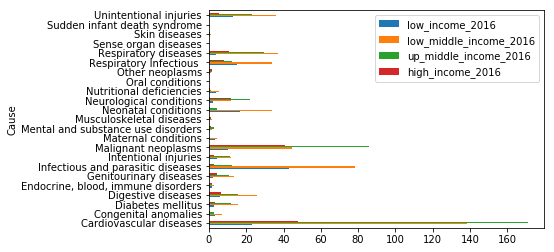

In [29]:
death_causes_2016_simplified.groupby(["Cause"]).agg("mean").plot.barh()

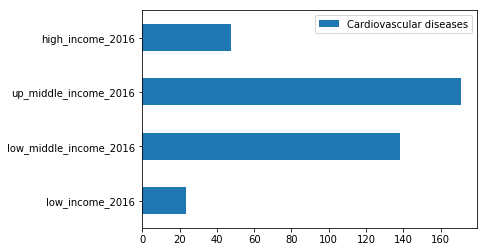

In [35]:
dfdf=death_causes_2016_simplified[death_causes_2016_simplified.Cause=="Cardiovascular diseases"].T
dfdf.columns=['Cardiovascular diseases']
dfdf.iloc[2:].plot.barh()

The richer is the country, the more meat and alcohol its population consumes, but not every country have the same health system.

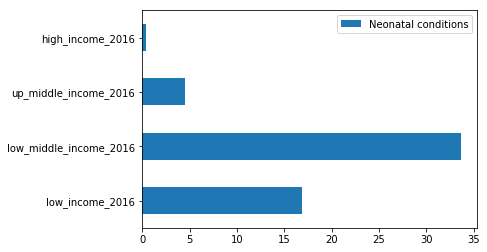

In [31]:
heart=death_causes_2016_simplified[death_causes_2016_simplified.Cause=="Neonatal conditions"].T
heart.columns=['Neonatal conditions']
heart.iloc[2:].plot.barh()

The poorer is the country, the more children die, because of the terrible hygiene conditions and lack of maternity services

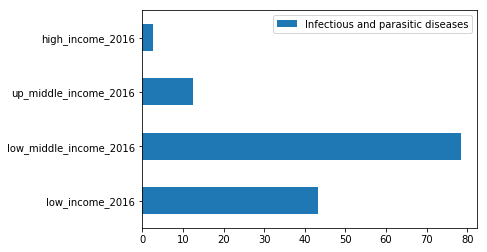

In [32]:
infectious=death_causes_2016_simplified[death_causes_2016_simplified.Cause=="Infectious and parasitic diseases"].T
infectious.columns=['Infectious and parasitic diseases']
infectious.iloc[2:].plot.barh()

Lack of clean water, high heat and nature, you know.

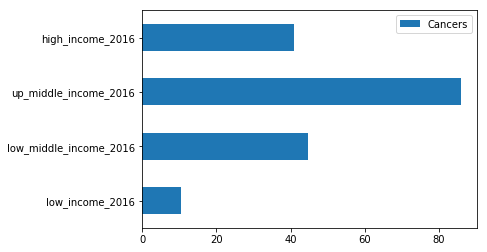

In [39]:
cancers=death_causes_2016_simplified[death_causes_2016_simplified.Cause=="Malignant neoplasms"].T
cancers.columns=['Cancers']
cancers.iloc[2:].plot.barh()

KeyError: 'gdp_per_cap'

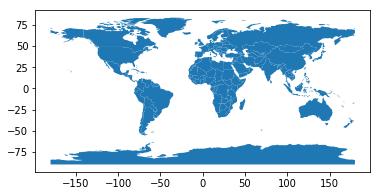

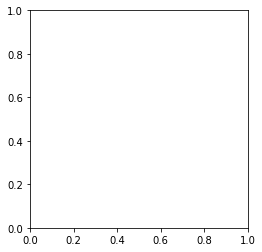

In [34]:
import geopandas 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()
world.plot(column='gdp_per_cap');

People live older in rich countries, so instead of dying from nature, they die from old age and lack of physical activity

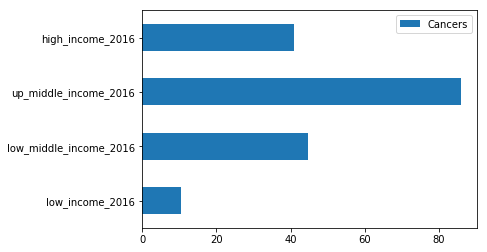

In [41]:
cancers=death_causes_2016_simplified[death_causes_2016_simplified.Cause=="Malignant neoplasms"].T
cancers.columns=['Cancers']
cancers.iloc[2:].plot.barh()

In [43]:
cancers.iloc[2:]

,Cancers
low_income_2016,10.3359
low_middle_income_2016,44.6578
up_middle_income_2016,86.016
high_income_2016,41.0462
